In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

import os

df = pd.read_csv("data/final_matches.csv", sep=",")

In [225]:
df.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,team,season
0,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3,0,Fulham,...,Match Report,NaN,13.0,5.0,14.1,2.0,0,0,Arsenal,2021
1,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2,1,West Ham,...,Match Report,NaN,7.0,3.0,14.8,0.0,0,0,Arsenal,2021
2,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1,3,Liverpool,...,Match Report,NaN,4.0,3.0,15.0,0.0,0,0,Arsenal,2021
3,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2,1,Sheffield Utd,...,Match Report,NaN,6.0,5.0,16.3,0.0,0,0,Arsenal,2021
4,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0,1,Manchester City,...,Match Report,NaN,11.0,3.0,18.4,2.0,0,0,Arsenal,2021


In [226]:
teams = df[["team"]].drop_duplicates()
victorias = df[df["result"] == "W"]["team"].value_counts()


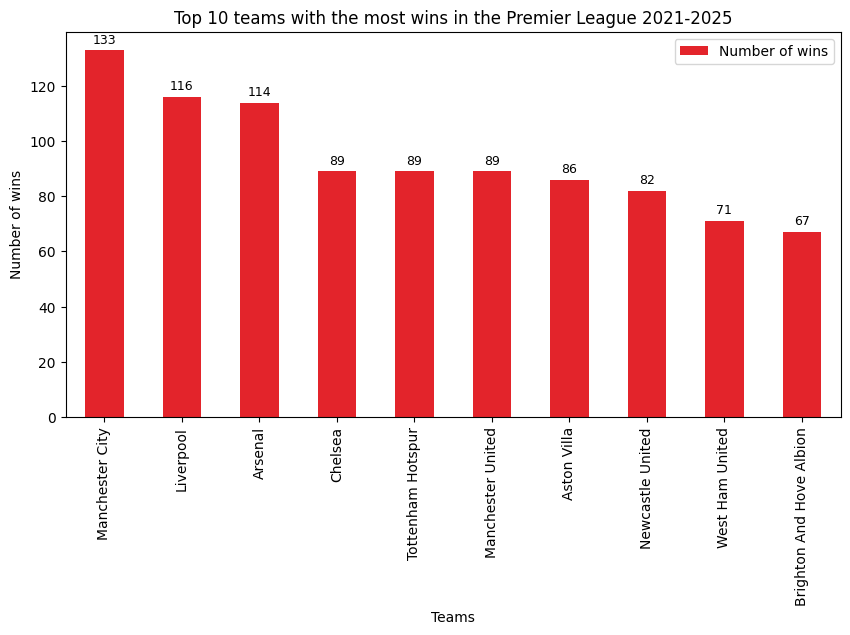

In [227]:
teams_graf = pd.DataFrame({
    "teams": teams["team"].values,
    "Number of wins": teams["team"].map(victorias).fillna(0).astype(int),
})
teams_graf = teams_graf.sort_values(by="Number of wins", ascending=False).head(10)

ax = teams_graf.plot(
    x="teams",
    y="Number of wins",
    kind="bar",
    figsize=(10, 5),
    color="#E3242B",
    legend=True,
)

ax.bar_label(ax.containers[0], padding=3, fontsize=9)
plt.title("Top 10 teams with the most wins in the Premier League 2021-2025")
plt.xlabel("Teams")
plt.ylabel("Number of wins")
plt.show()

In [228]:
formations = pd.concat(
    [df["formation"].replace("◆", ""), df["opp formation"].replace("◆", "")],
    ignore_index=True,
)
formations = formations.str.replace("◆", "")
formations = formations.value_counts().reset_index()
formations.columns = ["formation", "Wins"]
formations

,formation,Wins
0,4-2-3-1,2660
1,4-3-3,1612
2,3-4-3,988
3,4-4-2,704
4,3-5-2,344
5,4-1-4-1,316
6,4-4-1-1,200
7,5-3-2,150
8,3-4-1-2,138
9,5-4-1,136


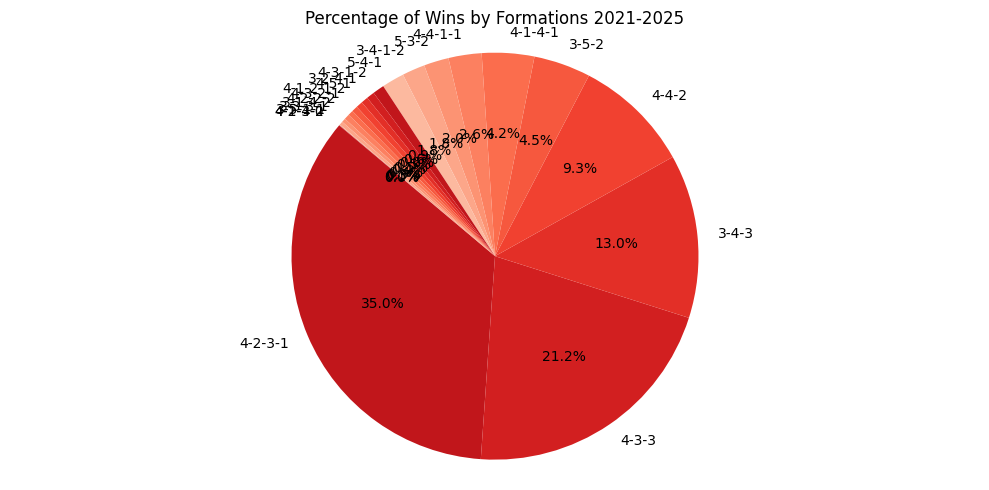

In [229]:
plt.figure(figsize=(10, 5))
plt.pie(
    formations["Wins"],
    labels=formations["formation"],
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Reds(range(200, 50, -15)),
)  # Degradado de rojos

plt.title(f"Percentage of Wins by Formations 2021-2025")
plt.axis("equal")  # Asegura que el gráfico sea un círculo perfecto
plt.tight_layout()
plt.show()